In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from sklearn.model_selection import train_test_split
import random

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


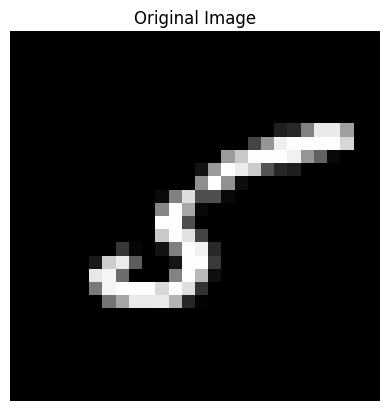

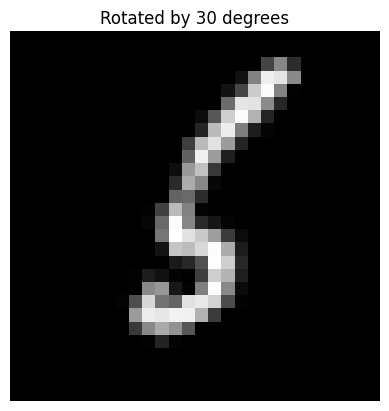

In [28]:
#Load & Normalize MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

#Add another dimension
x_test = np.expand_dims(x_test, axis=-1)
x_train = np.expand_dims(x_train, axis=-1)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

#Create function to rotate dataset images
def img_rotate(image, angle):
    img_rotated = []
    for img, angle in zip(image, angle):
        img = tf.keras.preprocessing.image.apply_affine_transform(
            img, theta=angle, row_axis=0, col_axis=1, channel_axis=2)
        img_rotated.append(img)
    return np.array(img_rotated)

#Test the function by rotating the 12th image in the training set by 30 degrees
plt.imshow(x_train[11].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

rotated_image = tf.keras.preprocessing.image.apply_affine_transform(
    x_train[11], theta=30, row_axis=0, col_axis=1, channel_axis=2)

plt.imshow(rotated_image.reshape(28, 28), cmap='gray')
plt.title(f'Rotated by {30} degrees')
plt.axis('off')
plt.show()

#Apply rotation to the dataset
rand_train_angles = np.random.uniform(0, 90, len(x_train))
rand_test_angles = np.random.uniform(0, 90, len(x_test))
x_train_rotated = img_rotate(x_train, rand_train_angles)
x_test_rotated = img_rotate(x_test, rand_test_angles)

In [6]:
#Create & train CNN model
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_cnn.summary()

model_cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_cnn = model_cnn.fit(
    x_train_rotated, rand_train_angles, epochs=20, validation_split=0.15)

c:\Users\Yomna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,729 (506.75 KB)

 Trainable params: 129,729 (506.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 431.0982 - mae: 15.7890 - val_loss: 147.8826 - val_mae: 9.2936
Epoch 2/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 165.0740 - mae: 9.9088 - val_loss: 109.5073 - val_mae: 7.9017
Epoch 3/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 127.3678 - mae: 8.6334 - val_loss: 90.4995 - val_mae: 7.1764
Epoch 4/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 104.8174 - mae: 7.8159 - val_loss: 72.4247 - val_mae: 6.3797
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 88.4992 - mae: 7.1533 - val_loss: 77.2555 - val_mae: 6.6991
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 77.7836 - mae: 6.7419 - val_loss: 66.3039 - val_mae: 6.1806
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 67.3818 - mae: 6.2527 - val_loss: 57.2256 - val_mae: 5.6567
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 59.5950 - mae: 5.8592 - val_loss: 46.4843 - val_mae: 5.1264
Epoc

313/313 - 1s - 2ms/step - loss: 21.0564 - mae: 3.2282
Test MSE: 21.056396484375
Test MAE: 3.2281694412231445


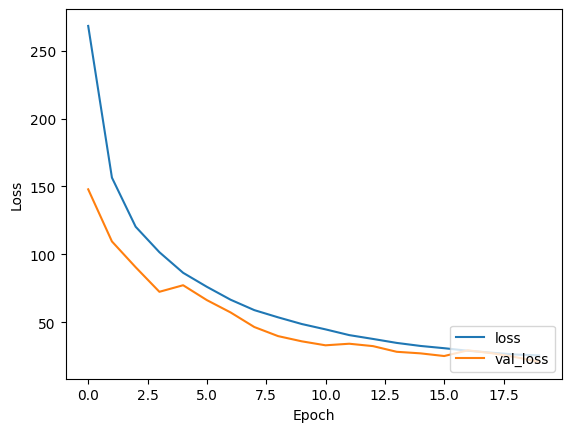

In [41]:
#Evaluate & save CNN model
plt.plot(history_cnn.history['loss'], label='loss')
plt.plot(history_cnn.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_mse_cnn, test_mae_cnn= model_cnn.evaluate(x_test_rotated,  rand_test_angles, verbose=2)
print("Test MSE:", test_mse_cnn)
print("Test MAE:", test_mae_cnn)
model_cnn.save('mnist_rotated_cnn.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Sample 1: Predicted Angle: 42.24°, Actual Angle: 41.81°
Sample 2: Predicted Angle: 42.80°, Actual Angle: 40.71°
Sample 3: Predicted Angle: 45.33°, Actual Angle: 47.59°
Sample 4: Predicted Angle: 5.70°, Actual Angle: 7.05°
Sample 5: Predicted Angle: 85.47°, Actual Angle: 80.28°
Sample 6: Predicted Angle: 23.24°, Actual Angle: 21.98°
Sample 7: Predicted Angle: 93.01°, Actual Angle: 88.73°
Sample 8: Predicted Angle: 52.42°, Actual Angle: 27.43°
Sample 9: Predicted Angle: 5.91°, Actual Angle: 6.14°
Sample 10: Predicted Angle: 71.48°, Actual Angle: 74.41°
Sample 11: Predicted Angle: 31.68°, Actual Angle: 32.73°
Sample 12: Predicted Angle: 42.05°, Actual Angle: 39.43°
Sample 13: Predicted Angle: 82.91°, Actual Angle: 78.39°
Sample 14: Predicted Angle: 16.79°, Actual Angle: 0.29°
Sample 15: Predicted Angle: 93.62°, Actual Angle: 83.49°
Sample 16: Predicted Angle: 63.38°, Actual Angle: 62.93°
Sample 17: Predicted Angle: 35.46°, Actual Angle: 37.85°
Samp

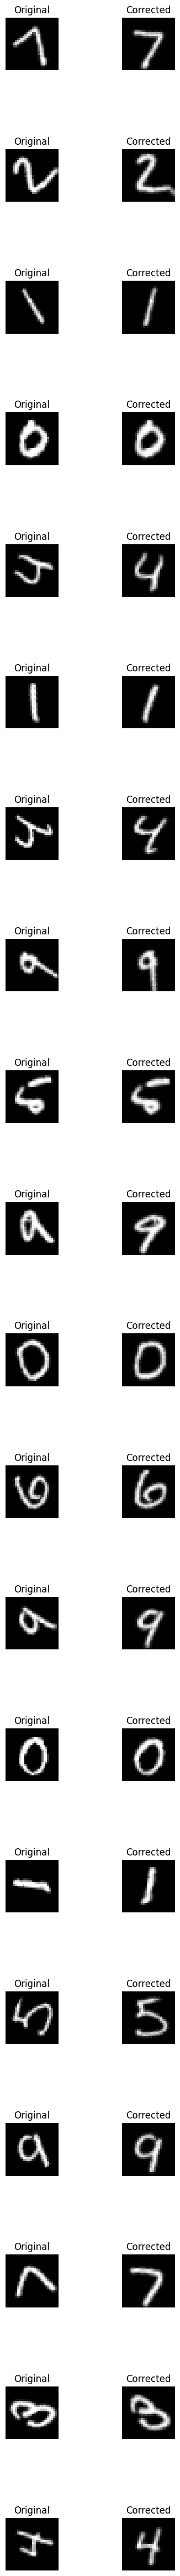

In [33]:
#Use CNN model to correct some test samples
predicted_angles_cnn = model_cnn.predict(x_test_rotated).flatten()

def img_correct(images, predicted_angles):
    correct_imgs = []
    for img, predicted_angle in zip(images, predicted_angles):
        correct_img = tf.keras.preprocessing.image.apply_affine_transform(
            img, theta=-predicted_angle, row_axis=0, col_axis=1, channel_axis=2)
        correct_imgs.append(correct_img)
    return np.array(correct_imgs)

x_test_corrected_cnn = img_correct(x_test_rotated, predicted_angles_cnn)

def display_images(original_images, corrected_images, predicted_angles, actual_angles, num_samples):
    plt.figure(figsize=(5, 3*num_samples))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i + 2)
        plt.imshow(corrected_images[i].reshape(28, 28), cmap='gray')
        plt.title('Corrected')
        plt.axis('off')

        plt.subplots_adjust(hspace=1.5)
        print(f"Sample {i+1}: Predicted Angle: {predicted_angles[i]:.2f}°, Actual Angle: {actual_angles[i]:.2f}°")
    plt.show()

display_images(x_test_rotated, x_test_corrected_cnn, predicted_angles_cnn, rand_test_angles, num_samples=20)

In [47]:
#Create & train ANN model
model_ann = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1) 
])

model_ann.summary()

model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_ann = model_ann.fit(
    x_train_rotated, rand_train_angles, epochs=20, validation_split=0.15
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 539.6139 - mae: 17.1973 - val_loss: 172.5408 - val_mae: 10.1593
Epoch 2/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 166.8010 - mae: 9.9306 - val_loss: 127.8478 - val_mae: 8.6851
Epoch 3/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 139.7835 - mae: 8.9983 - val_loss: 106.1014 - val_mae: 7.7742
Epoch 4/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 129.0490 - mae: 8.6159 - val_loss: 96.9171 - val_mae: 7.4198
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 117.7170 - mae: 8.2046 - val_loss: 90.1012 - val_mae: 7.0883
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 109.8901 - mae: 7.9261 - val_loss: 90.2690 - val_mae: 7.1355
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 103.1110 - mae: 7.6769 - val_loss: 89.8029 - val_mae: 7.1296
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 100.5349 - mae: 7.5455 - val_loss: 85.6641 - val_mae: 6.9144
Epoch 9/20


313/313 - 0s - 872us/step - loss: 74.1061 - mae: 6.2318
Test MSE: 74.10607147216797
Test MAE: 6.231785774230957


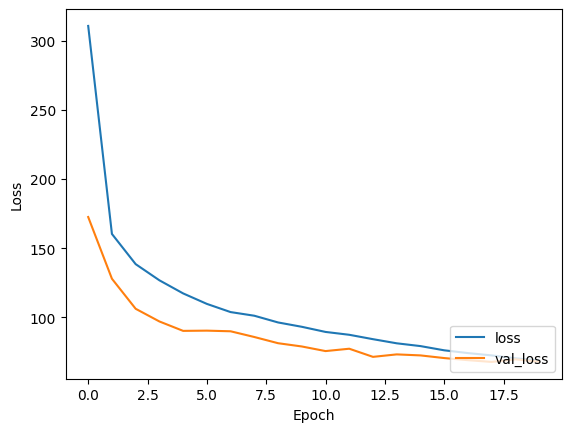

In [49]:
#Evaluate & save ANN model
plt.plot(history_ann.history['loss'], label='loss')
plt.plot(history_ann.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_mse_ann, test_mae_ann = model_ann.evaluate(x_test_rotated, rand_test_angles, verbose=2)
print("Test MSE:", test_mse_ann)
print("Test MAE:", test_mae_ann)
model_ann.save('mnist_rotated_ann.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
Sample 1: Predicted Angle: 34.09°, Actual Angle: 41.81°
Sample 2: Predicted Angle: 38.79°, Actual Angle: 40.71°
Sample 3: Predicted Angle: 43.63°, Actual Angle: 47.59°
Sample 4: Predicted Angle: 12.20°, Actual Angle: 7.05°
Sample 5: Predicted Angle: 86.37°, Actual Angle: 80.28°
Sample 6: Predicted Angle: 15.86°, Actual Angle: 21.98°
Sample 7: Predicted Angle: 89.27°, Actual Angle: 88.73°
Sample 8: Predicted Angle: 72.81°, Actual Angle: 27.43°
Sample 9: Predicted Angle: 13.72°, Actual Angle: 6.14°
Sample 10: Predicted Angle: 64.68°, Actual Angle: 74.41°
Sample 11: Predicted Angle: 40.95°, Actual Angle: 32.73°
Sample 12: Predicted Angle: 34.77°, Actual Angle: 39.43°
Sample 13: Predicted Angle: 78.23°, Actual Angle: 78.39°
Sample 14: Predicted Angle: 20.80°, Actual Angle: 0.29°
Sample 15: Predicted Angle: 89.09°, Actual Angle: 83.49°
Sample 16: Predicted Angle: 69.77°, Actual Angle: 62.93°
Sample 17: Predicted Angle: 31.13°, Actual Angle: 37.85°


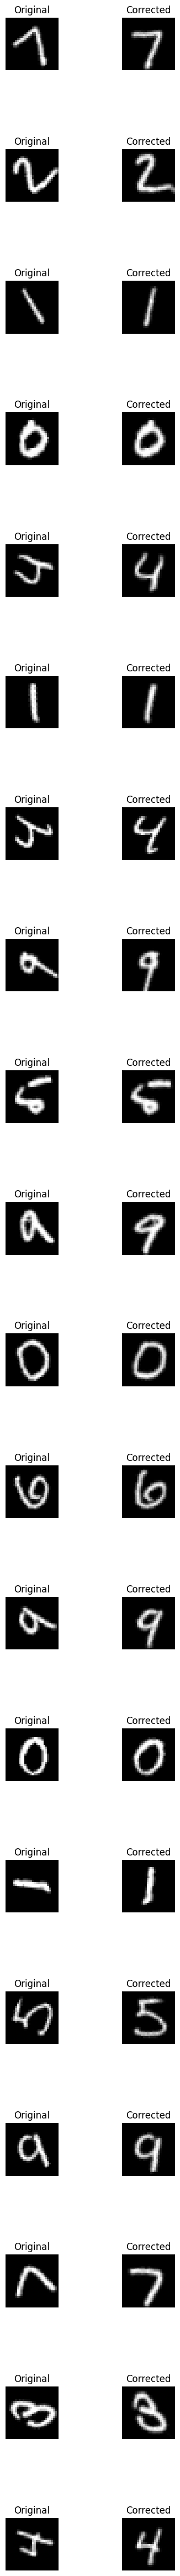

In [50]:
#Use ANN model to correct some test samples
predicted_angles_ann = model_ann.predict(x_test_rotated).flatten()

x_test_corrected_ann = img_correct(x_test_rotated, predicted_angles_ann)

display_images(x_test_rotated, x_test_corrected_ann, predicted_angles_ann, rand_test_angles, num_samples=20)

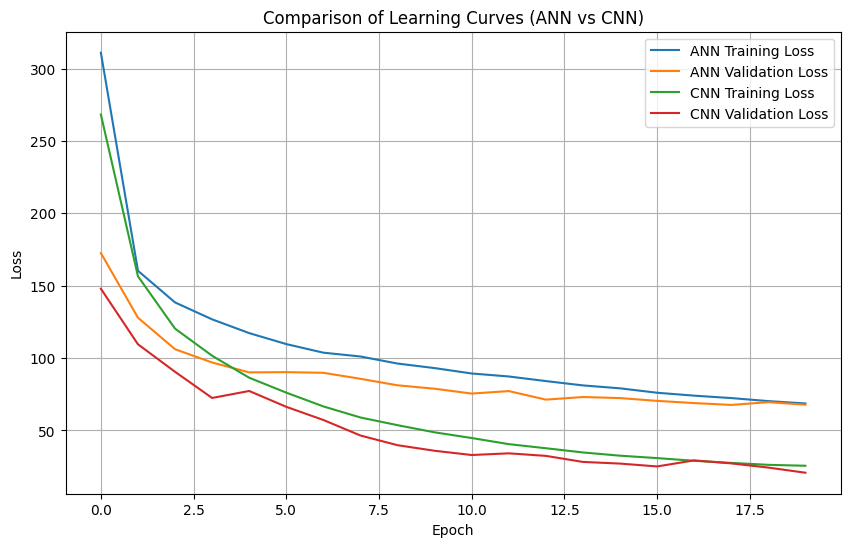

In [51]:
#Compare models performance
plt.figure(figsize=(10, 6))

# Plot ANN model learning curves
plt.plot(history_ann.history['loss'], label='ANN Training Loss')
plt.plot(history_ann.history['val_loss'], label='ANN Validation Loss')

# Plot CNN model learning curves
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')

plt.title('Comparison of Learning Curves (ANN vs CNN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


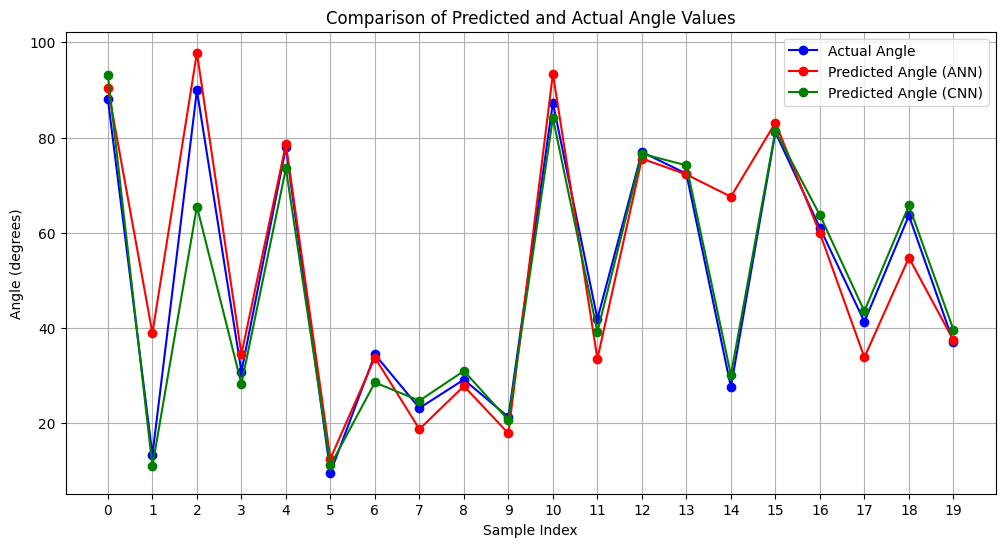

In [54]:
#Create a plot comparing predicted values with actual values for both models
num_samples = 20
indices = np.random.choice(len(x_test_rotated), num_samples, replace=False)

actual_angles = rand_test_angles[indices]

predicted_angles_ann = model_ann.predict(x_test_rotated)[indices].flatten()

predicted_angles_cnn = model_cnn.predict(x_test_rotated).flatten()[indices]

plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), actual_angles, 'bo-', label='Actual Angle')
plt.plot(range(num_samples), predicted_angles_ann, 'ro-', label='Predicted Angle (ANN)')
plt.plot(range(num_samples), predicted_angles_cnn, 'go-', label='Predicted Angle (CNN)')
plt.title('Comparison of Predicted and Actual Angle Values')
plt.xlabel('Sample Index')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.xticks(range(num_samples))
plt.show()